In [ ]:
продолжение задания на регрессию

In [283]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor # пробуем случайный лес
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns


data = pd.read_csv('data_regression_test.csv',sep=';')
data = data.drop(['mag_id','cat4_k2','count_am','count_k2','count_k1','count_k3','lat','lon'], axis=1)
data = data.drop(['cat1_k1','cat2_k1','cat3_k1','cat1_k2','cat2_k2','rev_k2','cat2_k3'], axis=1)


Y = data['rev_am']   # 
X = data.drop('rev_am', axis=1) #признаки

data.head(5)



,rev_am,org_id,reg_id,district_id,days open,cluster,count,rev_k1,rev_k3,cat3_k2,cat4_k1,cat1_k3,cat4_k3,cat3_k3
0,0.271793,1,1,1,7306,119,52,0.463816,0.558165,0.294530,0.204146,0.621938,0.290341,0.279691
1,0.419363,1,1,3,7189,156,3,0.468756,0.000000,0.000000,0.195983,0.175030,0.130655,0.069799
2,0.407493,1,1,2,7159,129,27,0.432768,0.561541,0.296725,0.313573,0.484975,0.313573,0.242499
3,0.482371,1,1,5,7111,167,3,0.429428,0.582500,0.000000,0.940338,0.269041,0.940338,0.102073
4,0.271793,1,1,1,7054,119,52,0.463816,0.558165,0.294530,0.204146,0.621938,0.290341,0.279691


In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


# кросс-валидация и подбор параметров




для построения модели есть смысл подкрутить некоторые параметры, , чтобы как-то влиять на точность и адаптировать алгоритм. например по умолчанию строит на столько глубокое дерево, насколько позволяет набор данных и модель может переобучится на данной выборке.

В качестве критерия "наилучшего" классификатора можно использовать кросс-валидацию.
для RandomForestRegressor будем рассматривать данные параметры:

1. n_estimators — кол-во деревьев 
2. max_depth — макс глубина дерева

Сначала посмотрим на эти параметры вместе, потом отдельно, затем используем grid search

обучившись на одних и тех-же данных несколько раз — подход будет предсказывать немного разные значения с разными вероятностями т.к. выборка ансамбля решающих деревьев происходит случайным образом.

In [245]:
max_depth_value = range(1, 100) 
# перебираем значения для глубины от 0 до 100 и для каждого считаем значения смотрим показатель 
# для обучающей выборки, для тестовой и среднего при кросс-валидации
scores_data = pd.DataFrame()
for max_depth in max_depth_value:
    clf = RandomForestRegressor(max_depth = max_depth)

    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
#     print(mean_cross_val_score)
    
    temp_scores_data = pd.DataFrame({'max_depth': [max_depth], 
                                     'train_score': [train_score], 
                                     'test_score': [test_score],
                                     'mean_cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_scores_data)
scores_data.head()


,max_depth,train_score,test_score,mean_cross_val_score
0,1,0.363263,0.587087,0.306905
0,2,0.522100,0.594973,0.361738
0,3,0.645264,0.541703,0.389602
0,4,0.748769,0.558785,0.408359
0,5,0.807595,0.563391,0.420537


максимальное значение mean_cross_val_score поличлось при значении:


,max_depth,train_score,test_score,mean_cross_val_score
0,68,0.925122,0.635804,0.483688


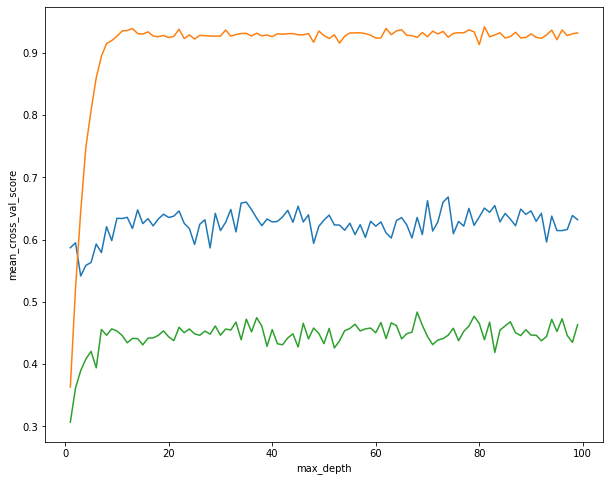

In [251]:
plt.figure(figsize=(10,8))
sns.lineplot(x='max_depth', y='test_score', data=scores_data);
sns.lineplot(x='max_depth', y='train_score', data=scores_data);
sns.lineplot(x='max_depth', y='mean_cross_val_score', data=scores_data);
print('максимальное значение mean_cross_val_score поличлось при значении:')
scores_data.sort_values(by='mean_cross_val_score', ascending=False).head(1)

In [252]:
n_estimators_value = range(1, 100)
scores_data = pd.DataFrame()
for n_estimators in n_estimators_value:
    clf = RandomForestRegressor(max_depth = 15, n_estimators = n_estimators)

    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
#     print(mean_cross_val_score)
    
    temp_scores_data = pd.DataFrame({'n_estimators': [n_estimators], 
                                     'train_score': [train_score], 
                                     'test_score': [test_score],
                                     'mean_cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_scores_data)
scores_data.head()

,n_estimators,train_score,test_score,mean_cross_val_score
0,1,0.726969,0.043267,-0.124202
0,2,0.804610,0.122781,0.259934
0,3,0.827831,0.153957,0.221098
0,4,0.911834,0.582009,0.252942
0,5,0.834797,0.495123,0.365458


максимальное значение mean_cross_val_score поличлось при значении:


,n_estimators,train_score,test_score,mean_cross_val_score
0,68,0.928986,0.590558,0.491752


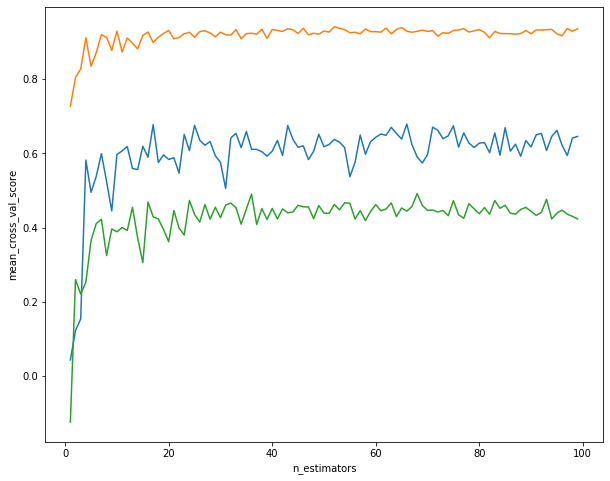

In [253]:
plt.figure(figsize=(10,8))
sns.lineplot(x='n_estimators', y='test_score', data=scores_data);
sns.lineplot(x='n_estimators', y='train_score', data=scores_data);
sns.lineplot(x='n_estimators', y='mean_cross_val_score', data=scores_data);
print('максимальное значение mean_cross_val_score поличлось при значении:')
scores_data.sort_values(by='mean_cross_val_score', ascending=False).head(1)

Но лучше все-таки оценивать эти два параметра вместе, 
будем смотреть для смотреть среднюю точность для 5 фолдов

In [149]:
from tqdm import tqdm


df = pd.DataFrame({       # здесь будем хранить полученные значения
    'n_estimators':[],
    'max_depth':[],
    'mean_score':[]
})
i1=[]
i2=[]
i3=[]
for i in tqdm(range(5,101,5)):        # генертруем n_estimators от 5 до 100 с шагом 5 (очень долго считается)
    for j in range(5,101,5):    # генертруем max_depth
        model = RandomForestRegressor(n_estimators=i,max_depth = j,n_jobs=-1) # для модели вставляем сгенированные параметры
#разбиваем на пять подмножества / фолда, получаем точность для каждого, а потом смотрим на их среднее
        p = cross_val_score(model, X, Y, cv=5).mean() 
        i1.append(i)
        i2.append(j)
        i3.append(p)
for i in range (len(i1)):    #заполняем data  значениеми из списка
    df.loc[len(df)] = [i1[i],i2[i],i3[i]]

100%|██████████| 20/20 [09:18<00:00, 27.92s/it]


получили табличку где каждого значения n_estimators и max_depth получили среднее значение точности 
для 5 разных разбиений на выборки (для теста и для тренировки модели)

In [157]:
df.head(5)

,n_estimators,max_depth,mean_score
0,5.0,5.0,0.220594
1,5.0,10.0,0.224580
2,5.0,15.0,0.163840
3,5.0,20.0,0.265941
4,5.0,25.0,0.352671


In [163]:
# отсортируем по убыванию по колонке mean_score  и посмотрим на значения с макс знач mean_score
df = df.sort_values(by='mean_score', ascending=False) 
df.head(1)

,n_estimators,max_depth,mean_score
23,10.0,20.0,0.425741


Видим, что максимальное значение было при n_estimators = 10, max_depth  = 20

# Подбор параметров с помощью grid search

In [69]:
k = []
for i in range(5,101,5): # генертруем список от 5 до 100 с шагом 5(беру шаг 5 т.к. долго считается)
    k.append(i)
print(k)
parameter_grid = {'max_depth': k,        # будем смотреть для параметров max_depth(глубина дерева) 
                  'n_estimators': k}     # и n_estimators (кол-во деревьев)       
clf = RandomForestRegressor() 
grid_searcher = GridSearchCV(clf, parameter_grid) 
grid_searcher.fit(X,Y) # обучаем модель для каждого набора параметров
clf_best = grid_searcher.best_estimator_  # Смотрим при каких параметрах была максимальная точность 
print('Best params = ', clf_best.get_params())


[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
Best params =  {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 15, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


GridSearch определил, что при параметрах 'max_depth': 15, 'n_estimators': 20 наша модель лучше всего обучается

В придыдущем примере значение было n_estimators = 10, max_depth  = 20

Получились немного разные значения, т.к. RandomForestRegressor предсказывает немного разные значения с разными вероятностями т.к. выборка ансамбля решающих деревьев происходит случайным образом
Вторая причина неточности, что был большой шаг =5, при значении шаг =1 вычисления бы длились бы несколько часов.



# Добавим еще пару метрик качества
метрики качества в задачах регрессии:

средняя квадратичная ошибка, 
средняя абсолютная ошибка, 
коэффициент детерминации,
квантильная ошибка

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
regressor = RandomForestRegressor(n_estimators=20,max_depth = 15,n_jobs=-1)
regressor.fit(X_train,y_train)
regressor.score(Xtest, Ytest) #точность

0.6942893152862081

In [276]:
y_predictions = regressor.predict(X_test)

In [277]:
#средняя абсолютная ошибка
metrics.mean_absolute_error(y_test, y_predictions)

0.044179054413912074

In [278]:
#средняя квадратичная ошибка
metrics.mean_squared_error(y_test, y_predictions)

0.009090374468071477

In [279]:
#Среднеквадратичное отклонение
sqrt(metrics.mean_squared_error(y_test, y_predictions))


0.09534345529752673

In [280]:
#Коэффициент детерминации (r2 score)
metrics.r2_score(y_test, y_predictions)


0.5273946643099081

# Теперь посмотрим важность параметров для построения модели.
То есть на то, какой признак внёс наибольший вклад в предсказания. У каких признаков наибольшая предсказательная способность.
будем использовать feature_importances_

org_id = 0.2539219786334405
reg_id = 0.12063004460161428
district_id = 0.05182893320756816
days open = 0.11434210945527555
cluster = 0.05383274216861647
count = 0.026607359585569493
rev_k1 = 0.04191278713062029
rev_k3 = 0.11901958477552367
cat3_k2 = 0.022028098067675538
cat4_k1 = 0.06517622554745463
cat1_k3 = 0.032065566359417326
cat4_k3 = 0.058354086192492424
cat3_k3 = 0.04028048427473179


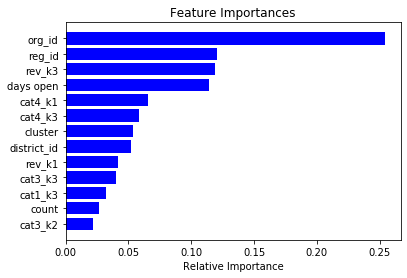

In [228]:
model = RandomForestRegressor(n_estimators=20,max_depth = 15,n_jobs=-1) 
model.fit(X,Y) #обучаем

for name, importance in zip(list(X), model.feature_importances_): #(чем выше, тем важнее функция) 
    print(name, "=", importance)



features = list(X)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



На графике отображены какой предикт какое влияние имелл на построенние модели

# Попробуем GradientBoostingRegressor
выберем параметры из grid searcher
посмотрим на показатели при разных выборках test и train

In [261]:
from sklearn.ensemble import GradientBoostingRegressor 
k = []
for i in tqdm(range(5,101,5)): # генертруем список от 5 до 100 с шагом 5(беру шаг 5 т.к. долго считается)
    k.append(i)
print(k)
parameter_grid = {'max_depth': k,        # будем смотреть для параметров max_depth(глубина дерева) 
                  'n_estimators': k}     # и n_estimators (кол-во деревьев)       
clf = GradientBoostingRegressor() 
grid_searcher = GridSearchCV(clf, parameter_grid) 
grid_searcher.fit(X,Y) # обучаем модель для каждого набора параметров
clf_best = grid_searcher.best_estimator_  # Смотрим при каких параметрах была максимальная точность 
print('Best params = ', clf_best.get_params())

100%|██████████| 20/20 [00:00<00:00, 46759.24it/s]


[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
Best params =  {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 85, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


n_estimators': 85
max_depth': 5

In [265]:
gb_model = GradientBoostingRegressor(n_estimators=85,max_depth = 5) 
cross_val_score(gb_model, X, Y, cv=5)

array([ 0.2465146 ,  0.67564896,  0.46973634,  0.72439735, -0.305725  ])

org_id = 0.37307771306809334
reg_id = 0.007598020509858863
district_id = 0.04789222619605821
days open = 0.10968894045741898
cluster = 0.1007099984558833
count = 0.022501580495395697
rev_k1 = 0.04006304735003232
rev_k3 = 0.11138188073309806
cat3_k2 = 0.02026104040584598
cat4_k1 = 0.038772801723361124
cat1_k3 = 0.05350109823052717
cat4_k3 = 0.037471773784925576
cat3_k3 = 0.03707987858950134


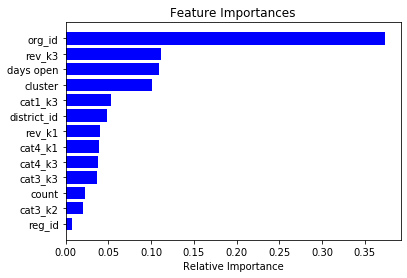

In [269]:
gb_model = GradientBoostingRegressor(n_estimators=85,max_depth = 5) 
gb_model.fit(X,Y) #обучаем

for name, importance in zip(list(X), gb_model.feature_importances_): #(чем выше, тем важнее функция) 
    print(name, "=", importance)
features = list(X)
importances = gb_model.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [ ]:
дальше можно по аналогии,
если что-то не учел или забыл, можете указать, исправлю